In [51]:
#utils.install_packages('package')

import rpy2
from rpy2.robjects.packages import importr

base = importr('base')
utils = importr('utils')
graphics = importr('graphics')
stats    = importr('stats')
grdevices = importr('grDevices')
from rpy2.robjects.lib import grdevices
lattice = importr('lattice')
ggplot2 = importr('ggplot2')
limma = importr('limma')
edger = importr('edgeR')
dplyr = importr('dplyr')
tidyr = importr('tidyr')

import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import FloatVector as c
from rpy2.robjects.vectors import DataFrame
from rpy2.robjects import globalenv as var 
rprint = robjects.globalenv.get("print")

r = robjects.r

from IPython.display import Image, display

print(rpy2.__version__)
print(r('.libPaths()')[0])

2.8.6
D:/Users/Emperor Justinian/Anaconda/envs/tensorflowprojects/R/library


In [2]:
def render(x=None, y=None, width=1024, height=896, res=150, col='green', main='Scatterplot', xlab='plant', ylab='animal', pch=19, plot='plot'):

    with grdevices.render_to_bytesio(grdevices.png, 
                                     width=width,
                                     height=height, 
                                     res=res) as img:
        rcommand = str('{0}').format(str(x))
        if plot == 'plot':
            graphics.plot(x, y, col=col, main=main, xlab=xlab, ylab=ylab, pch=pch)
        if plot == 'box':
            graphics.boxplot(x, col=col, main=main, xlab=xlab, ylab=ylab, pch=pch)
        if plot == 'biplot':
            stats.biplot(x)
        if plot == 'hclust':
            #clust = stats.hclust(x)
            r('clust <- hclust(dist(t(m), method="eu"))')
            clust = var["clust"]
            graphics.plot(clust)
        if plot == 'prcomp':
            r('pr <- prcomp(' + rcommand + ', centre=TRUE, scale.=TRUE)')
            pr = var["pr"]
            graphics.plot(pr)
        if plot == 'plotMDS':
            r('countmds <- plotMDS(countlist)')
        if plot == 'plotMeanVar':
            r("plotMeanVar("+ rcommand +")")
        if plot == 'plotBCV':
            r("plotBCV("+ rcommand +")")
        if plot == 'plotSmear':
            r("plotSmear("+ rcommand +", de.tags=Genes)")
            graphics.abline(h=r('c(-1, 1)'), col=2)
   
    display(Image(data=img.getvalue(), format='png', embed=True))
    
#r("plantd")

In [64]:
r('fDir <- "/Users/Emperor Justinian/Jupyter Notebooks/Bio-Inf R/"')

r('cnts <- read.delim(paste0(fDir,"SRR898768X_CountMatrix.txt.csv"), header=TRUE, sep=",")') #Ik heb '# Todt (c)' uit de txt verwijderd ivm errors
#RNA-Seq-counts.txt Gebruik sep = '\t'
#SRR898768X_CountMatrix.txt
r('cnts <- cnts[,-1]')

r('m <- as.matrix(cnts)')
print(r('head(m)'))      

     SRR8987684 SRR8987685 SRR8987686

[1,]          0          0          0

[2,]          0         66          0

[3,]          0         14          0

[4,]          1        268          1

[5,]          0        129          0

[6,]          0         68          0



In [88]:
r('files <- list.files(path = fDir, pattern = "Counts.csv$")')

r('DF <-  read.csv(files[1])') # Indeces starten met 1 in R...
r('for (f in files[-1]) DF <- cbind(DF, read.csv(paste0(fDir, f), header=TRUE, sep="\t"))') # Concat de dfs
r('colnames(DF) <- c("SRR8987669","SRR8987671", "count1", "SRR8987673", "count2", "SRR8987684", "count3", "SRR8987685", "count4", "SRR8987686", "count5")')
r('DF <- separate(data = DF, col = "SRR8987669", into = c("SRR8987669", "count0"), sep = "\\t")') # Split de eerste kolom op tabs
r('DF <- DF[,-c(3,5,7,9,11)]') # Verwijderd deze kolommen
r('colnames(DF) <- c("Genes","SRR8987669","SRR8987671","SRR8987673","SRR8987684","SRR8987685","SRR8987686")') # ReIntroduceert de namen
r('DF <- transform(DF, SRR8987669 = as.numeric(SRR8987669))') # maakt ints van deze kolom
r('DF <- DF[,-c(1)]') # Verwijderd deze kolom
r('m <- data.matrix(DF)') # Dataframe naar matrix

print(r('head(m)'))

     SRR8987669 SRR8987671 SRR8987673 SRR8987684 SRR8987685 SRR8987686

[1,]          0          0          0          0         66          0

[2,]          0          0          1          0         14          0

[3,]          3          1          1          1        268          1

[4,]          0          0          2          0        129          0

[5,]          0          0          1          0         68          0

[6,]          0          0          0          1        204          0



In [89]:
print(r('summary(m)'))

   SRR8987669         SRR8987671         SRR8987673         SRR8987684      

 Min.   :       0   Min.   :       0   Min.   :       0   Min.   :       0  

 1st Qu.:       0   1st Qu.:       0   1st Qu.:       0   1st Qu.:       0  

 Median :       0   Median :       0   Median :       0   Median :       0  

 Mean   :    1568   Mean   :    1522   Mean   :    1497   Mean   :    1599  

 3rd Qu.:       2   3rd Qu.:       1   3rd Qu.:       1   3rd Qu.:       1  

 Max.   :30824527   Max.   :30326527   Max.   :29567983   Max.   :32209806  

   SRR8987685          SRR8987686      

 Min.   :      0.0   Min.   :       0  

 1st Qu.:      4.0   1st Qu.:       0  

 Median :     87.5   Median :       0  

 Mean   :   1621.0   Mean   :    1538  

 3rd Qu.:   1112.0   3rd Qu.:       1  

 Max.   :2410124.0   Max.   :30531600  



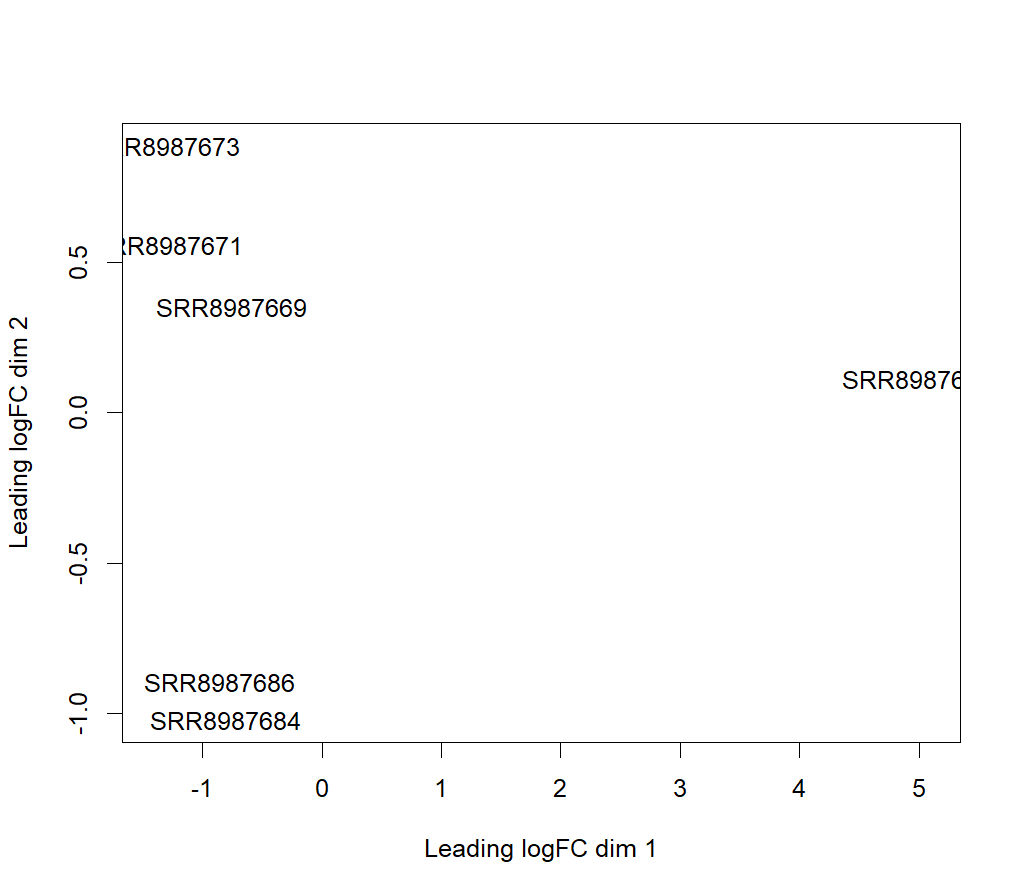

In [91]:
#r('group <- factor(c(1,1,2,2,1,1,2,2))') # for testdata
r('group <- factor(c(1,1,1,2,2,2))')
r('countlist <- DGEList(counts=m, group=group)')
r('keep <- filterByExpr(countlist)') 
r('countlist <- countlist[keep, keep.lib.sizes=FALSE]')
r('countlist <- calcNormFactors(countlist, method="TMM")') # Possibly add Yuen's t-test
render(r('countlist'), main='mds', plot='plotMDS')
r('design <- model.matrix(~group)')
r('GLMcomdisp <- estimateGLMCommonDisp(countlist, design)')
r('GLMtrenddisp <- estimateGLMTrendedDisp(countlist, design)')
r('GLMtagdisp <- estimateGLMTagwiseDisp(GLMcomdisp, design)')
r('countlist <- estimateDisp(countlist)');

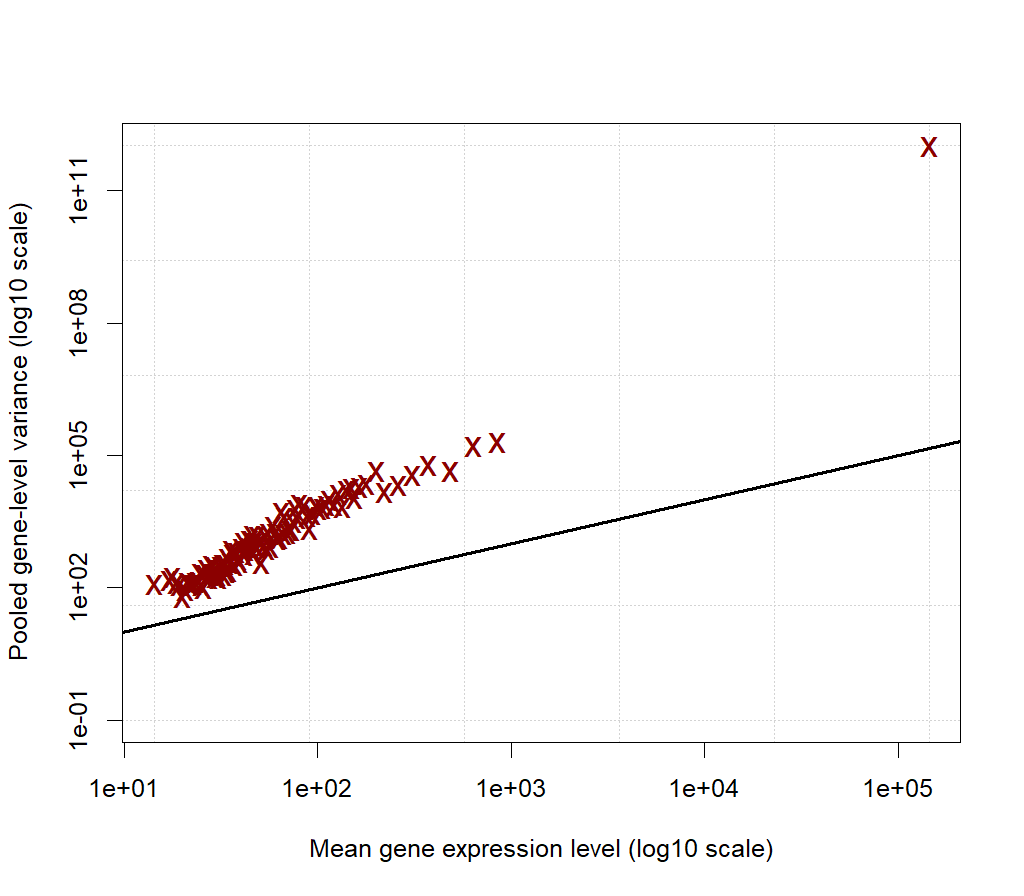

In [92]:
render('GLMcomdisp', main='mean var', plot='plotMeanVar')

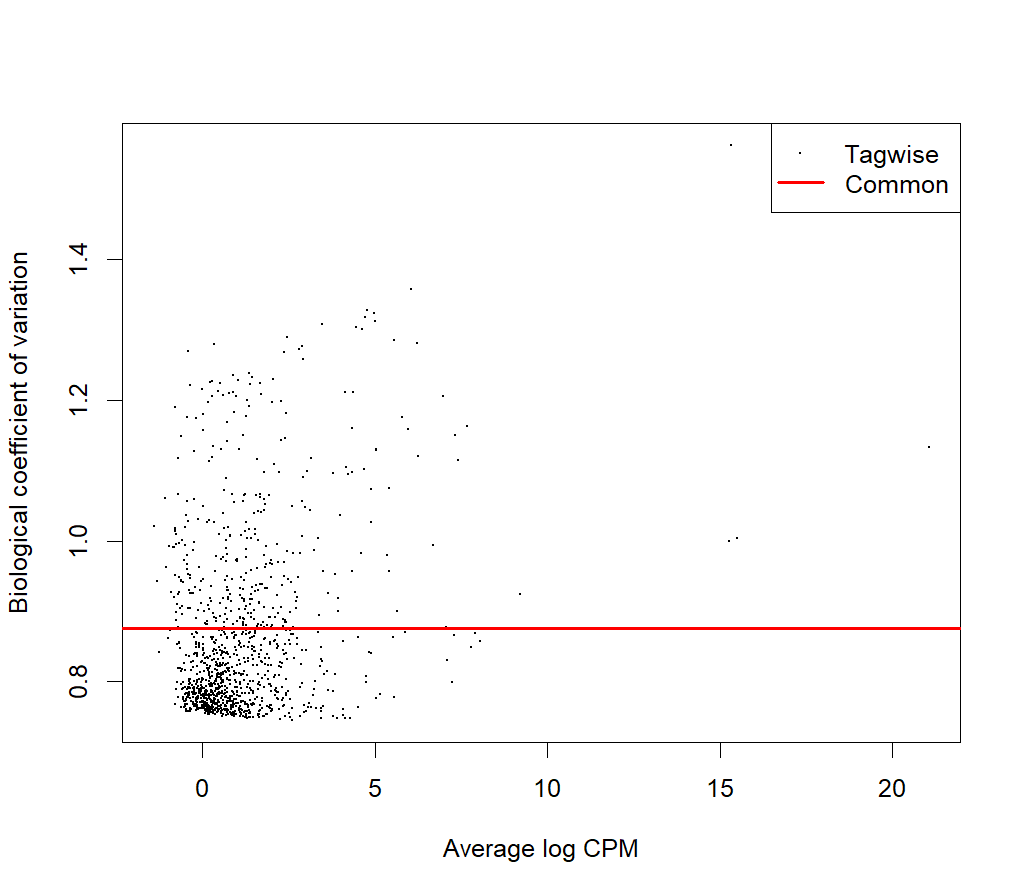

In [93]:
render('GLMtagdisp', main='BCV', plot='plotBCV')

In [94]:
r('fit <- glmFit(countlist,design)')
r('lrt <- glmLRT(fit,coef=2)')
r('edgeR_result <- topTags(lrt)')
print(r('edgeR_result'))

Coefficient:  group2 

           logFC      logCPM       LR       PValue          FDR

15705 -12.370801  0.70201958 70.02233 5.863698e-17 6.584932e-14

13114  12.574551 -0.24853569 39.64806 3.041059e-10 1.707555e-07

8018   -4.909429 -0.03853941 37.68453 8.316150e-10 3.113012e-07

17895  -4.748103 -0.63839715 34.11984 5.182016e-09 1.454851e-06

17543  13.501862  0.67535844 29.28322 6.253495e-08 1.404535e-05

16359   4.614629  0.21675288 22.09635 2.593026e-06 4.853280e-04

16202  -3.215783  1.07644169 20.24906 6.798687e-06 1.090704e-03

3340   12.070300 -0.75711062 19.68795 9.117456e-06 1.279863e-03

13876   4.801327  0.40734730 18.60574 1.607360e-05 2.005628e-03

19433   6.276169  0.33415101 17.53506 2.820577e-05 3.167508e-03



In [21]:
r("write.csv(as.data.frame(edgeR_result), file='siggenes.csv', row.names = TRUE)"); # topTags(lrt,n=15000)

rpy2.rinterface.NULL

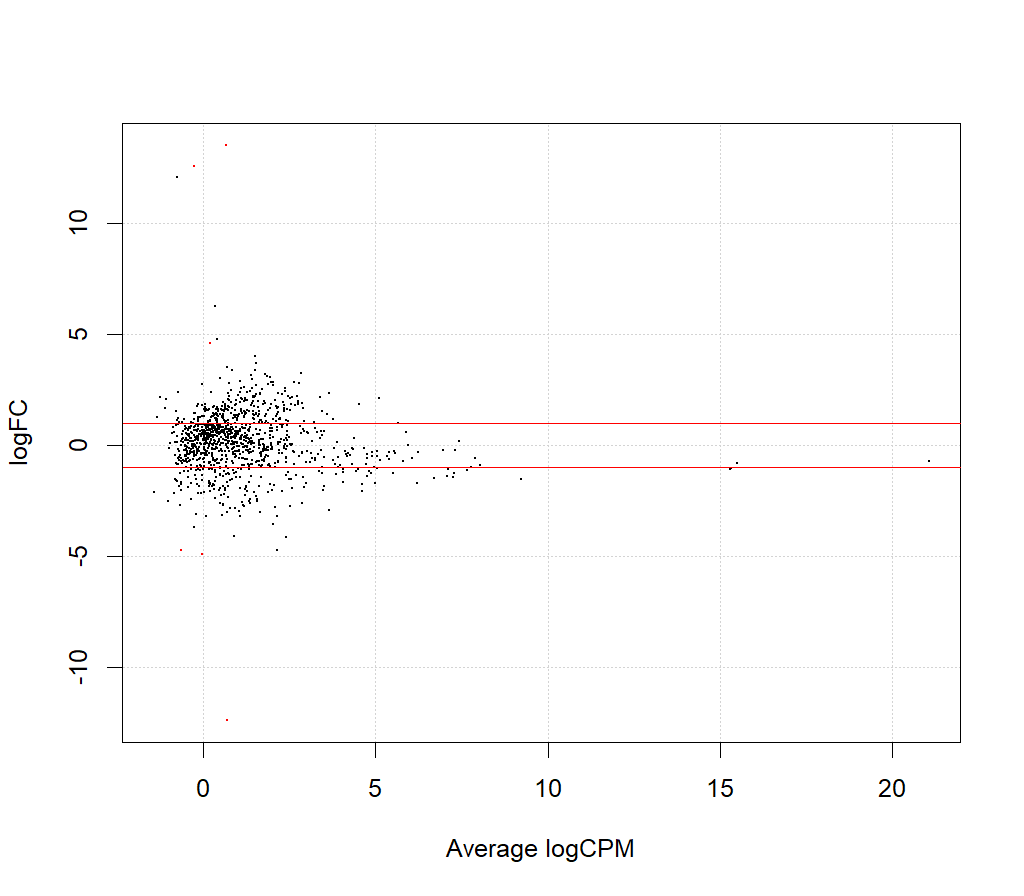

In [95]:
r('Genes <- decideTestsDGE(lrt, p=0.001)')
r('Genes <- rownames(lrt)[as.logical(Genes)]')
render('lrt', main='plotSmear', plot='plotSmear')

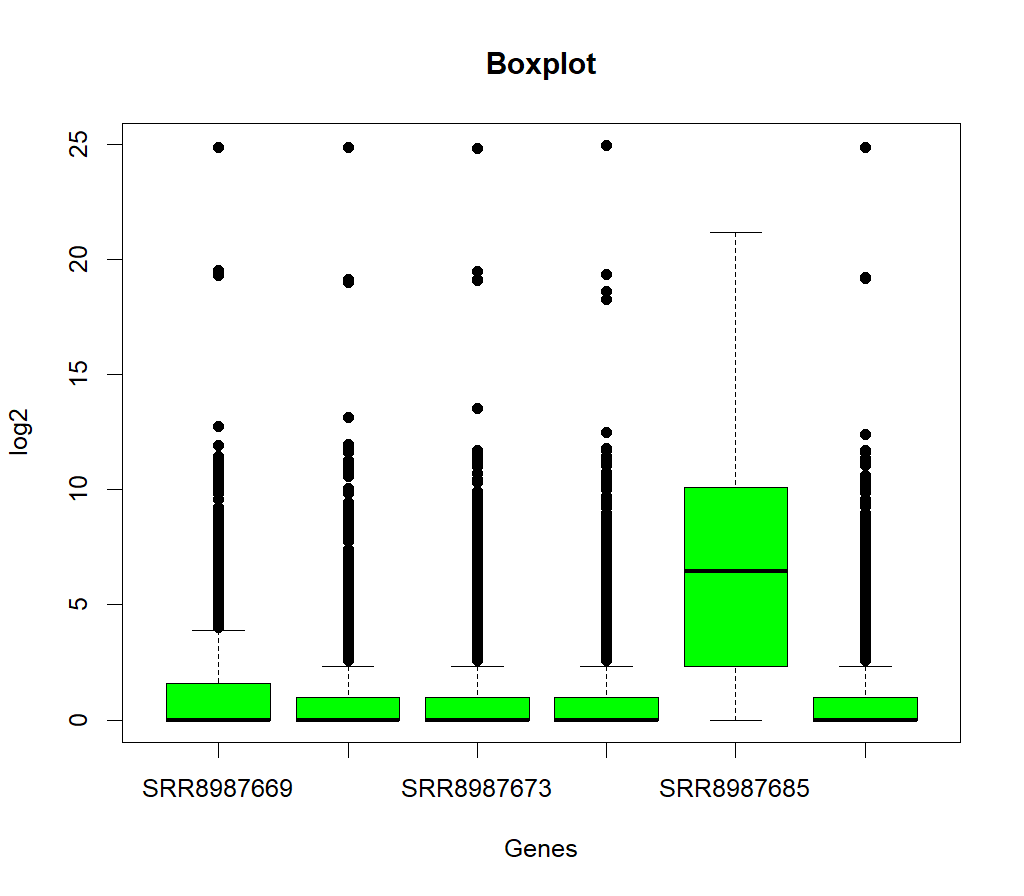

In [101]:
r('lm <- log2(m+1)')

r('lm <- na.omit(lm)')
r('m <- na.omit(m)')

r('pdf(paste0(fDir,"res.pdf"),width=10,height=10)')
 
render(r('lm'), main='Boxplot', xlab='Genes', ylab='log2', plot='box')

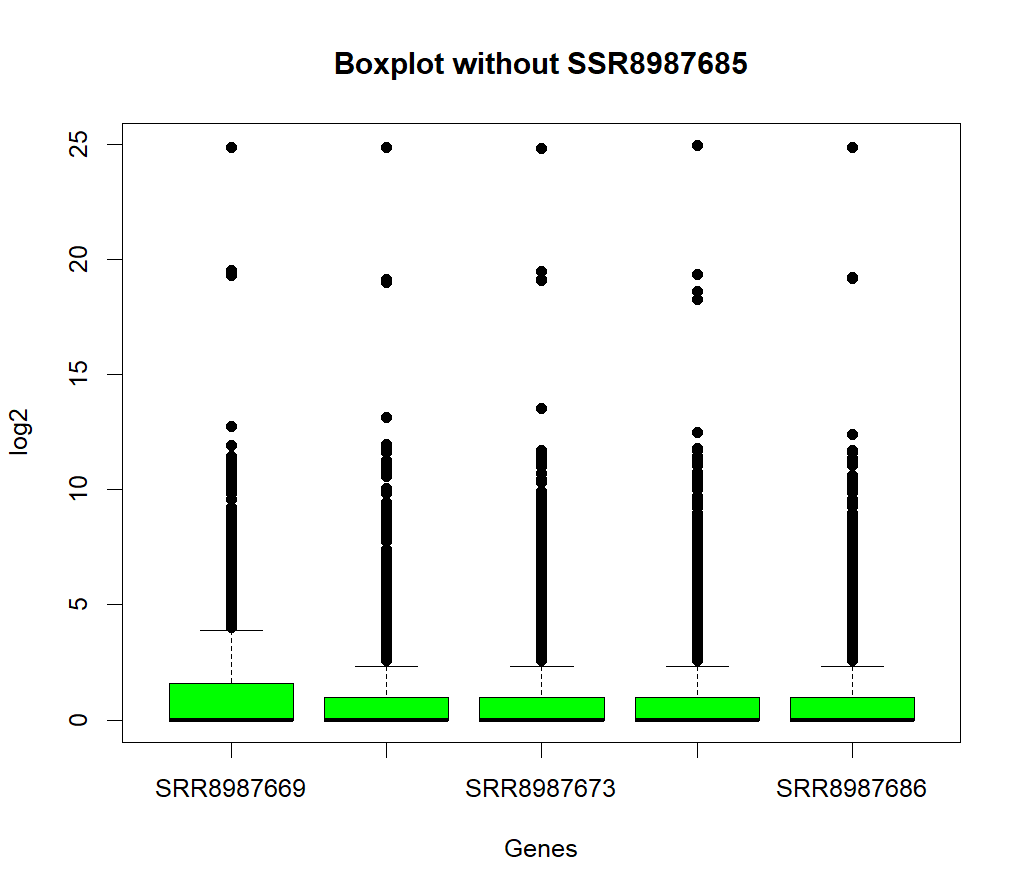

In [103]:
r('m2 <- m[,c("SRR8987669","SRR8987671","SRR8987673","SRR8987684","SRR8987686")]')

r('lm2 <- log2(m2 +1)')

r('lm2 <- na.omit(lm2)')
r('m2 <- na.omit(m2)')

r('pdf(paste0(fDir,"res.pdf"),width=10,height=10)')
 
render(r('lm2'), main='Boxplot without SSR8987685', xlab='Genes', ylab='log2', plot='box')

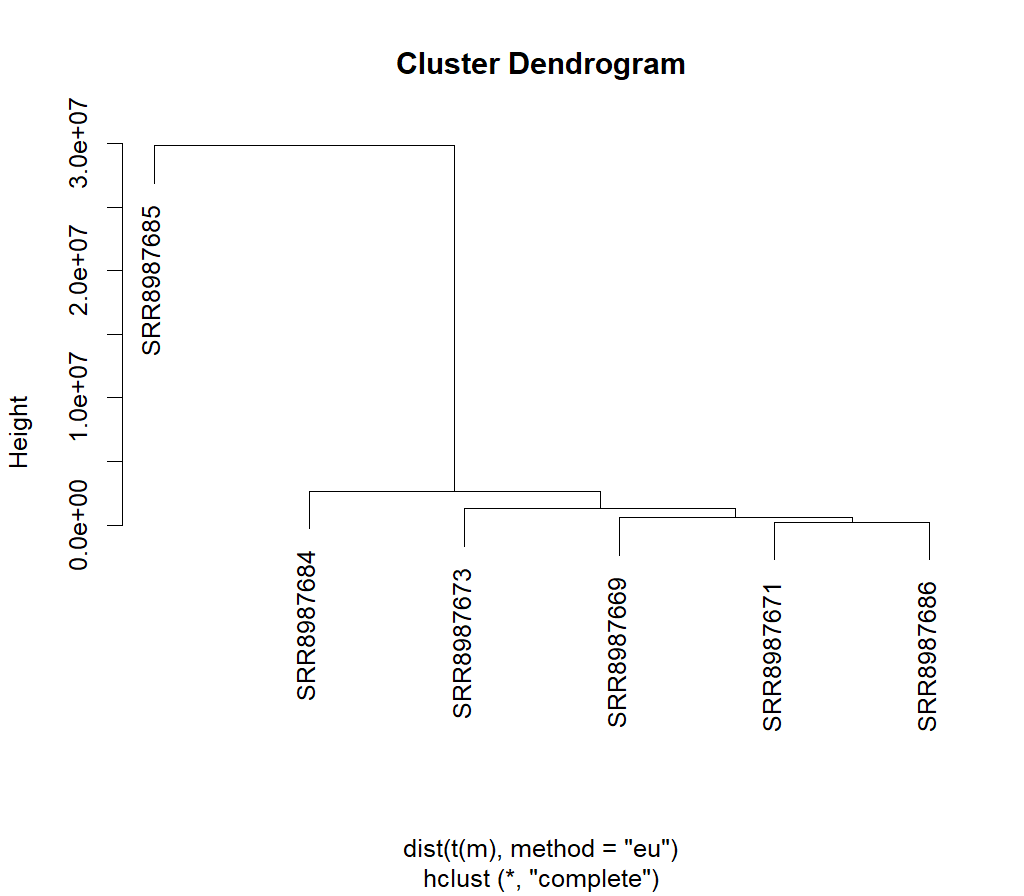

In [97]:
render(r('dist(t(m))'), plot='hclust')

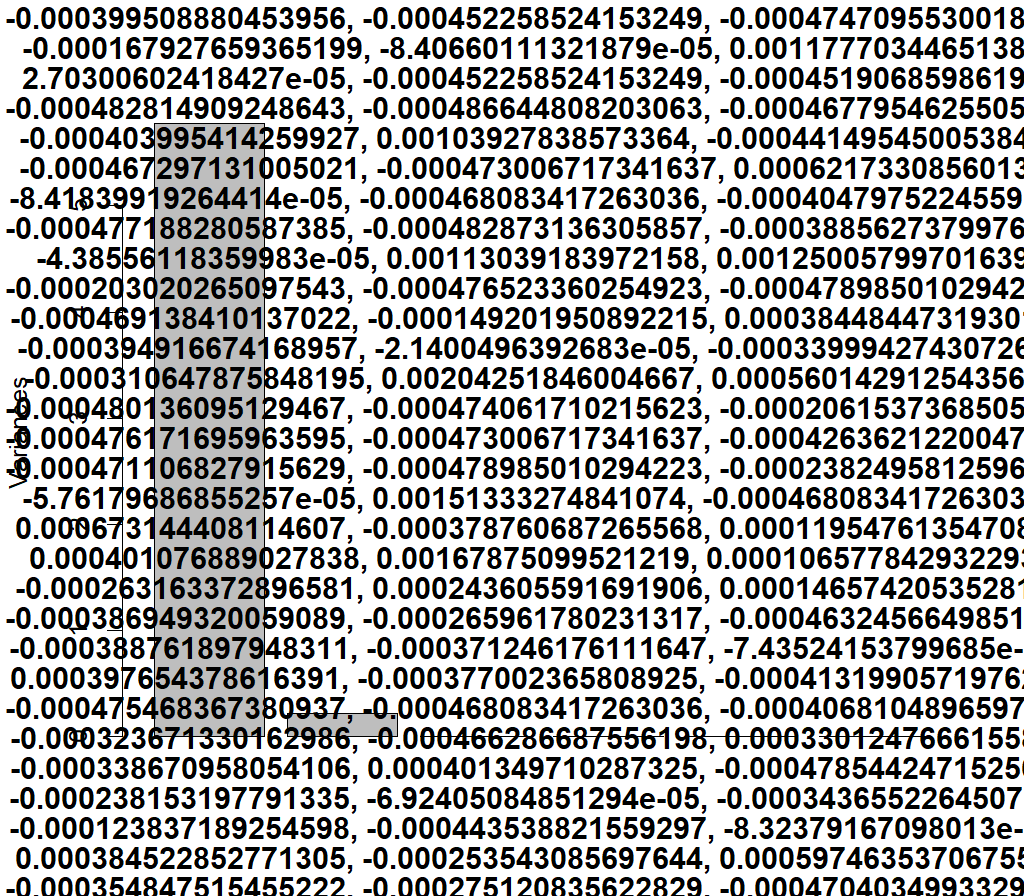

In [98]:
render('m', plot='prcomp')

In [99]:
print(r('summary(pr)'))

Importance of components:

                          PC1     PC2     PC3     PC4       PC5       PC6

Standard deviation     2.4041 0.46936 0.01193 0.00423 0.0009967 6.922e-05

Proportion of Variance 0.9633 0.03672 0.00002 0.00000 0.0000000 0.000e+00

Cumulative Proportion  0.9633 0.99997 1.00000 1.00000 1.0000000 1.000e+00



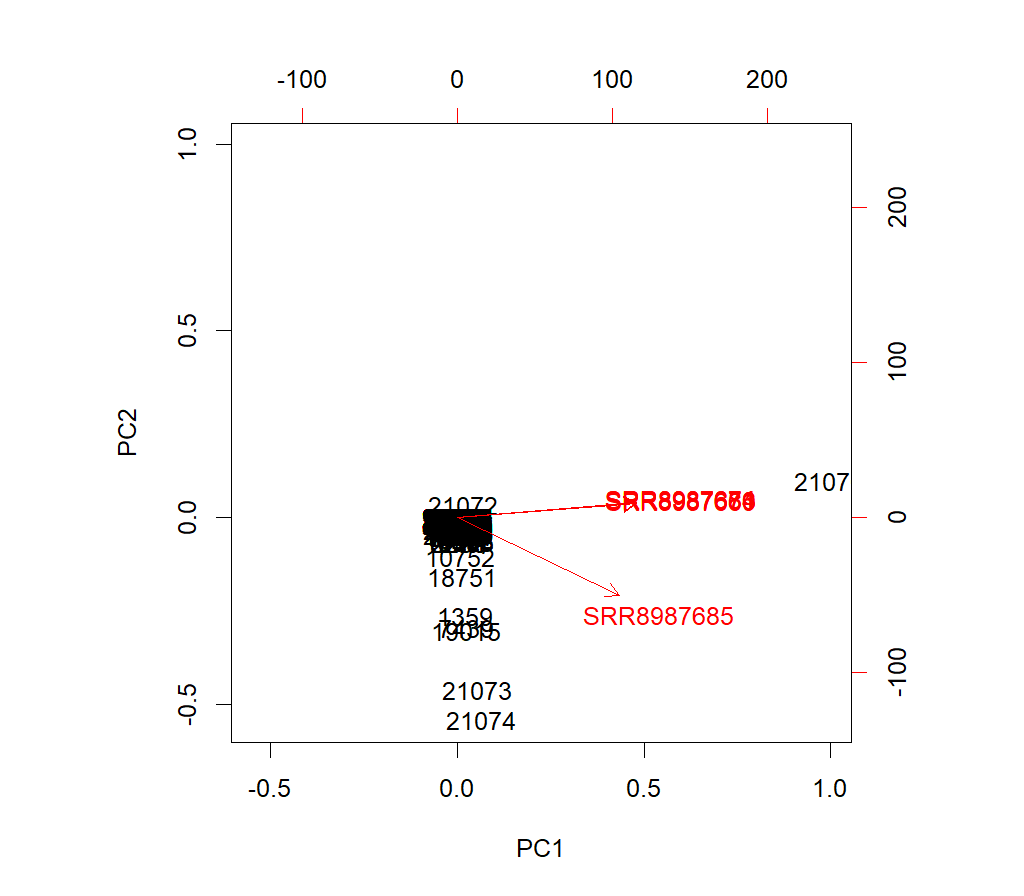

In [100]:
render(r('pr'), plot='biplot')
r('dev.off()'); # De ; is belangrijk zodat hij geen extra output cell geeft